In [1]:
# importing needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import seaborn as sns

In [2]:
def get_data():
    path = input("Please type your dataset path: ")
    
    # checking if data file exists
    while (not os.path.isfile(path)):
        path = input("Please type a valid path: ")
    
    # checking datafile extension
    extension = os.path.splitext(path)[1]
    if (extension == ".csv"):
        return (pd.read_csv(path))
    elif (extension == ".sql"):
        return (pd.read_sql(path))
    elif (extension == ".xls"):
        return (pd.read_excel(path))
    else:
        print("ERROR:: Not a valid file extension, try again.")
        return 1

In [3]:
def explore_data(data):
    print("==================== Data Head ====================")
    print(data.head())
    print("==================== Data Description ====================")
    print(data.describe())
    print("==================== Data info ====================")
    print(data.info())

In [4]:
def preprocess_data(data, num_cols, cat_cols):
    # checking and dropping duplicates
    if data.duplicated().sum() > 0:
        data.drop_duplicates(inplace=True)
    
    # check if data missing is a certain proportion, to decide, drop or fill
    if (data.isnull().any(axis=1).sum() < (len(data)/100)):
        data.dropna(inplace=True)
    
    else:        
        # Handling missing values for numerical columns
        data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

        # Handling missing values for object categorical columns
        data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])
    
    return ("=================== PREPROCESSING DONE ===================")
            

In [5]:
def visualize_data(data, col):
    if col in num_cols:
        plt.figure()
        sns.boxplot(x = data[col])
        plt.show()
        plt.figure()
        sns.histplot(data[col])
        plt.show()
    
    else:
        category_counts = data[col].value_counts()
        
        # Create the bar plot
        plt.bar(category_counts.index, category_counts.values)
        plt.title('Bar Plot: {}'.format(col))
        plt.xlabel(col)
        plt.ylabel('Count')

Please type your dataset path: C:\Users\SAM_DK1\Documents\data\International_Report_Departures.csv
=================== PREPROCESSING DONE ===================
==================== Data Head ====================
     data_dte  Year  Month  usg_apt_id usg_apt  usg_wac  fg_apt_id fg_apt  \
0  05/01/2006  2006      5       12016     GUM        5      13162    MAJ   
1  05/01/2003  2003      5       10299     ANC        1      13856    OKO   
2  03/01/2007  2007      3       10721     BOS       13      12651    KEF   
3  12/01/2004  2004     12       11259     DAL       74      16271    YYZ   
4  05/01/2009  2009      5       13303     MIA       33      11075    CMW   

   fg_wac  airlineid carrier  carriergroup        type  Scheduled  Charter  \
0     844      20177     PFQ             1  Departures          0       10   
1     736      20007      5Y             1  Departures          0       15   
2     439      20402      GL             1  Departures          0        1   
3     936      

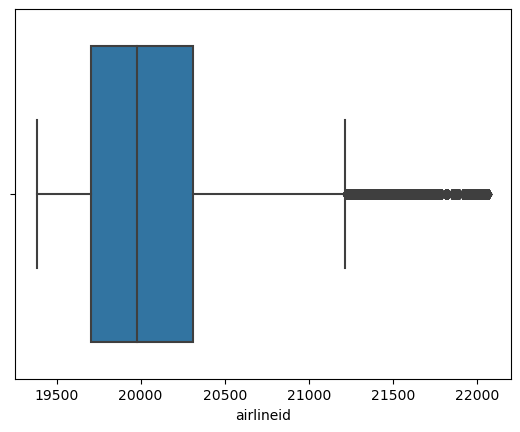

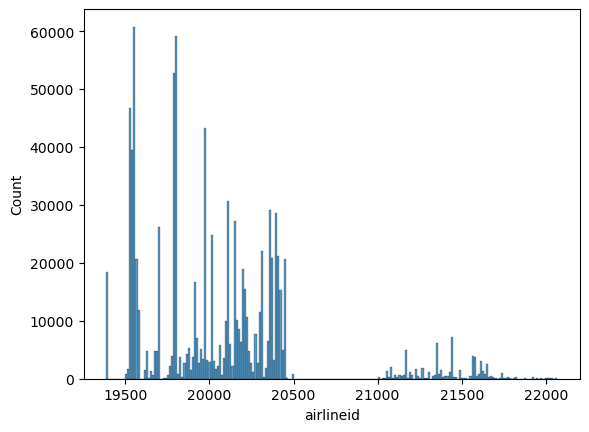

In [6]:
data = get_data()

# getting numerical and categorical columns separated
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

print(preprocess_data(data, num_cols, cat_cols))
explore_data(data)

col = input("Please Enter a column to work with: ")
while (col not in data.columns):
    col = input("Please Enter an existing column: ")

visualize_data(data, col)


    
